#Basic imports/initialisations

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/document_detection/models/research

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/document_detection/models/research


In [0]:
%tensorflow_version 1.x
import numpy as np
import os
import tensorflow as tf
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from google.colab.patches import cv2_imshow

TensorFlow 1.x selected.


In [0]:
# exports the PYTHONPATH environment variable with the reasearch and slim folders' paths
os.environ['PYTHONPATH'] += ':/content/drive/My Drive/document_detection/models/research/:/content/drive/My Drive/document_detection/models/research/slim/'

#Graph Loading

In [0]:
# path to the frozen graph:
PATH_TO_FROZEN_GRAPH = '/content/drive/My Drive/document_detection/models/research/fine_tuned_model/frozen_inference_graph.pb'

# path to the label map
PATH_TO_LABEL_MAP = '/content/drive/My Drive/document_detection/data/label_map.pbtxt'

# number of classes 
NUM_CLASSES = 3

In [0]:
#reads the frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

#converts the label_map to a category index
label_map = label_map_util.load_labelmap(PATH_TO_LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=False)
category_index = label_map_util.create_category_index(categories)


#Image Loading

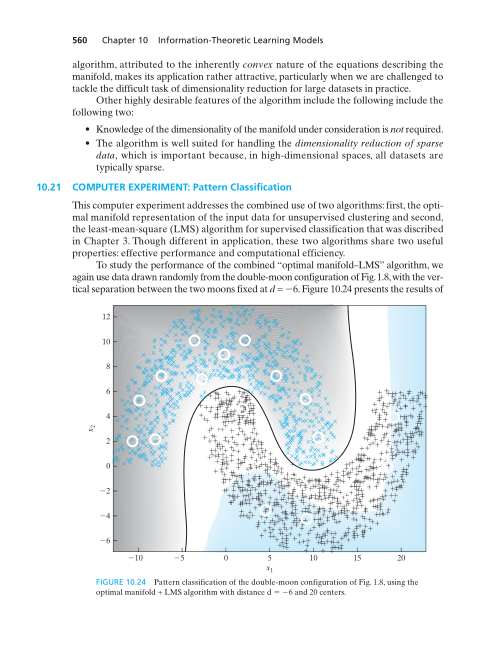

In [0]:
#path to the image you want to predict
image_np = cv2.imread('/content/drive/My Drive/document_detection/data/images/test32_590.jpg')
cv2_imshow(image_np)

#Prediction

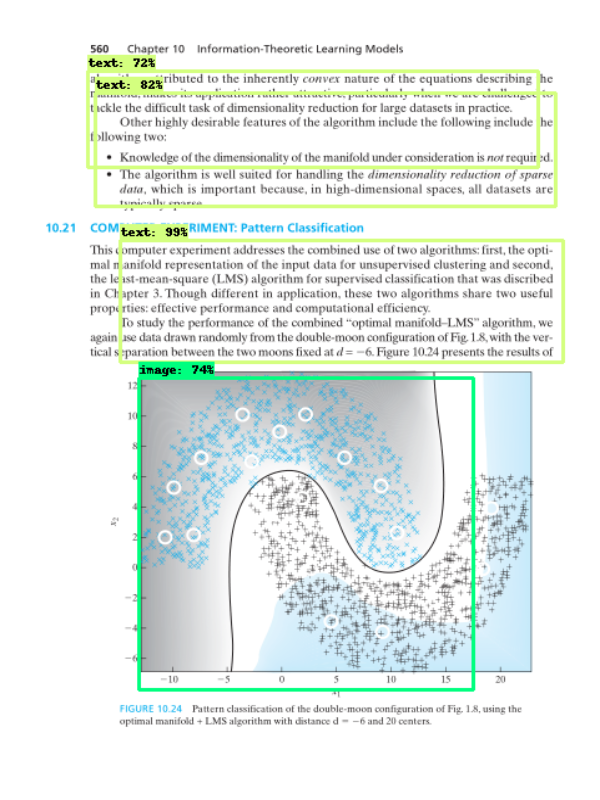

In [0]:
image_np = cv2.imread('/content/drive/My Drive/document_detection/data/images/test32_590.jpg')
# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Extract image tensor
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Extract detection boxes
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Extract detection scores
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        # Extract detection classes
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        # Extract number of detections
        num_detections = detection_graph.get_tensor_by_name(
            'num_detections:0')
        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        #Threshold of the prediction(we keep the prediction if its score is above 50%)
        threshold = 0.5
        boxes = np.squeeze(boxes)[np.squeeze(scores)>threshold]
        classes = np.squeeze(classes)[np.squeeze(scores)>threshold]
        scores = np.squeeze(scores)[np.squeeze(scores)>threshold]
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=3,
            )
    # Display output
        cv2_imshow(cv2.resize(image_np, (600, 800)))
        cv2.waitKey(0)